# <center> Лабораторная №4

### Задание:

Решить задачу Коши со значением шага $h_1 = 0.1$ и $h_2 = 0.01$. Сравнить результаты графически.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Условие  (вариант 1): 

\[
\begin{cases}
(x-2)^2y''-(x-2)y'-3y = 0 \\
y(3) = 2 \\
y'(3) = 2 &&  
\end{cases}
x \in [3,4]
\]

### Теория:

Задача Коши $n$-го порядка ставится следующим образом:


\begin{cases}
y^{(n)} = f(x,y,y',y'',...,y^{(n-1)}), \\
y(x_0) = y_0, \\
y'(x_0) = y_{01}, \\
y''(x_0) = y_{02}, \\
... \\
y^{(n-1)}(x_0) = y_{0(n-1).}
\end{cases}


Приведем ОДУ высокого порядка к задаче ОДУ первого порядка. Для этого введем новые переменные:

$z_1 = y'$; $z_2 = y''$;...; $z_{n-1} = y^{(n-1)}$

С ними перепишем исходную задачу:


\begin{cases}
y' = z_1, \\
z_1' = z_2, \\
z_2' = z_3, \\
... \\
z_{n-1}' = f(x,y,z_1,z_2,...,z_{n-1})
\end{cases}

Тогда для нашей задачи система такая:

\[
\begin{cases}
y' = z_1, \\
z_1' = f(x,y,z_1) =  \frac{(x-2)y'+3y}{(x-2)^2} \\
y(3) = 2 \\
y'(3) = 2 &&  
\end{cases}
x \in [3,4]
\]

In [12]:
x_0 = 3
y_0 = 2
z1_0 = 2
x_1 = 4
h_1 = 0.1
h_2 = 0.01

In [13]:
def z1(x,z):
    return z

def z2(x,y,z1):
    return (z1*(x-2)+3*y)/(x-2)**2

In [16]:
def ODU(x_0,x_1,y_0,z1_0,h):
    y = y_0
    z = z1_0
    x = x_0
    x_arr = [x]
    y_arr = [y]
    z_arr = [z]
    z2_arr = [z2(x,y,z)]
    while x_1 > x:
        K1 = h*z1(x,y)
        K2 = h*z1(x+0.5*h,y+0.5*K1)
        K3 = h*z1(x+0.5*h,y+0.5*K2)
        K4 = h*z1(x+h,y+K3)
        z += 1/6*(K1+2*K2+2*K3+K4)
        
        K1 = h*z2(x,y,z)
        K2 = h*z2(x+0.5*h,y+0.5*K1,z+0.5*K1)
        K3 = h*z2(x+0.5*h,y+0.5*K2,z+0.5*K2)
        K4 = h*z2(x+h,y+K3,z+K3)
        y += 1/6*(K1+2*K2+2*K3+K4)
        x += h
        x_arr += [x]
        y_arr += [y]
        z_arr += [z]
        z2_arr += [z2(x,y,z)]
    return {'x': np.array(x_arr), 'y': np.array(y_arr), 'z': np.array(z_arr), 'z2': np.array(z2_arr)}

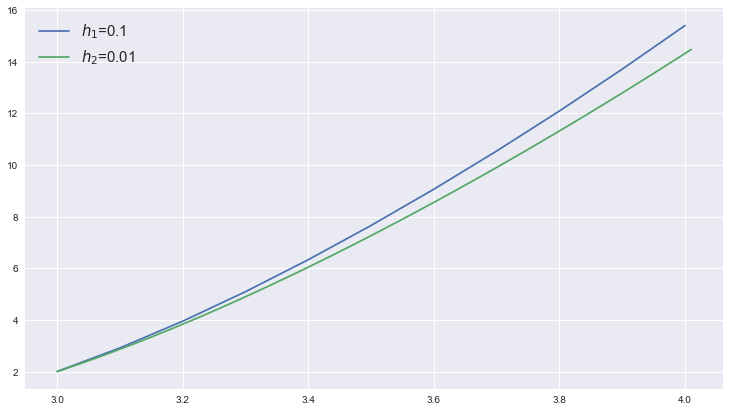

In [17]:
data1 = ODU(x_0,x_1,y_0,z1_0,h_1)
data2 = ODU(x_0,x_1,y_0,z1_0,h_2)
#data3 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['y'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['x'],data2['y'],'-', label = '$h_2$='+str(h_2))
#ax.plot(data3['x'],data3['y'],'-', label = '$h_3$='+str(h_2))
plt.legend(fontsize = 15)
#plt.title("Adam's methods", size = 18)
plt.show()

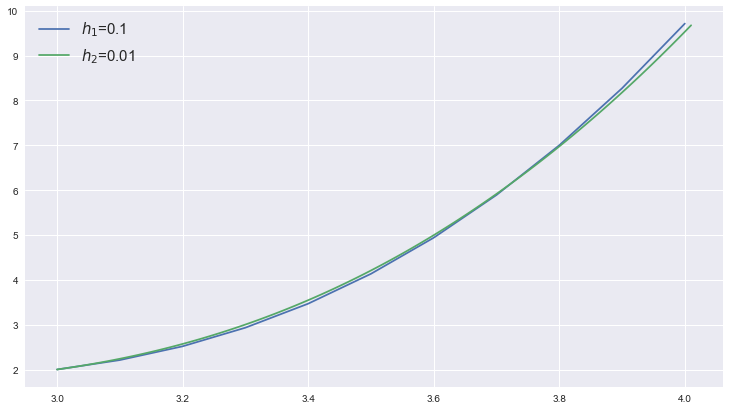

In [18]:
data1 = ODU(x_0,x_1,y_0,z1_0,h_1)
data2 = ODU(x_0,x_1,y_0,z1_0,h_2)
#data3 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['z'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['x'],data2['z'],'-', label = '$h_2$='+str(h_2))
#ax.plot(data3['x'],data3['y'],'-', label = '$h_3$='+str(h_2))
plt.legend(fontsize = 15)
#plt.title("Adam's methods", size = 18)
plt.show()

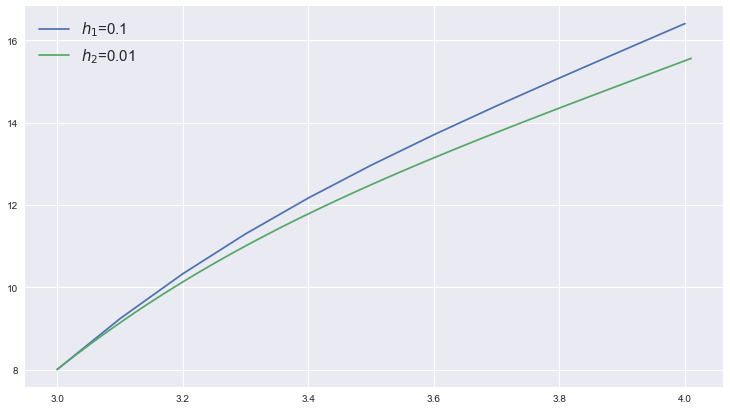

In [19]:
data1 = ODU(x_0,x_1,y_0,z1_0,h_1)
data2 = ODU(x_0,x_1,y_0,z1_0,h_2)
#data3 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['z2'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['x'],data2['z2'],'-', label = '$h_2$='+str(h_2))
#ax.plot(data3['x'],data3['y'],'-', label = '$h_3$='+str(h_2))
plt.legend(fontsize = 15)
#plt.title("Adam's methods", size = 18)
plt.show()

### **Задание:**

1. Построить график $y(y')$ 


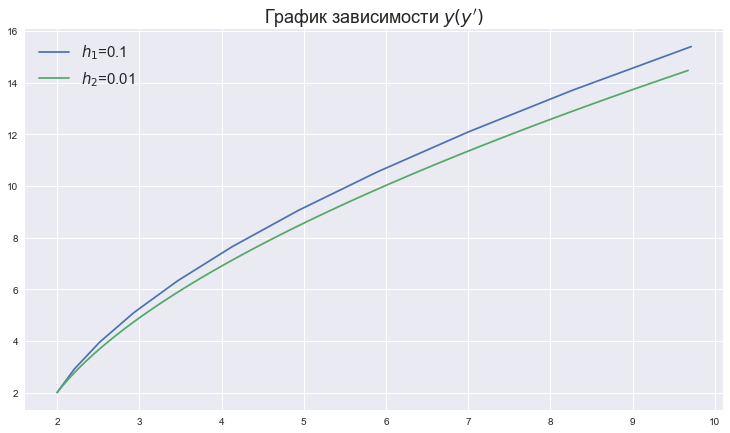

In [20]:
data1 = ODU(x_0,x_1,y_0,z1_0,h_1)
data2 = ODU(x_0,x_1,y_0,z1_0,h_2)
#data3 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['z'],data1['y'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['z'],data2['y'],'-', label = '$h_2$='+str(h_2))
#ax.plot(data3['x'],data3['y'],'-', label = '$h_3$='+str(h_2))
plt.legend(fontsize = 15)
plt.title("График зависимости $y(y')$", size = 18)
plt.show()

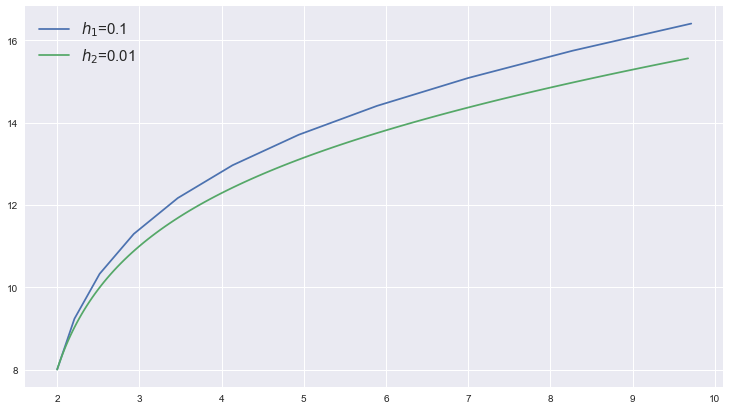

In [21]:
data1 = ODU(x_0,x_1,y_0,z1_0,h_1)
data2 = ODU(x_0,x_1,y_0,z1_0,h_2)
#data3 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['z'],data1['z2'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['z'],data2['z2'],'-', label = '$h_2$='+str(h_2))
#ax.plot(data3['x'],data3['y'],'-', label = '$h_3$='+str(h_2))
plt.legend(fontsize = 15)
#plt.title("Adam's methods", size = 18)
plt.show()